In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def simulate_dynamics(state,input_,dt):
    dynamics = np.zeros((3,))
    dynamics[0] = input_[0] * math.cos(state[2])
    dynamics[1] = input_[0] * math.sin(state[2])
    dynamics[2] = math.tan(input_[1])*input_[0] / 0.35
    
    new_state = state + dynamics * dt
    return new_state

In [3]:
K = 50
N = 20
dt = 0.04
V = 1.5
trajectory_table = np.empty((5,3,N+1))
p_d = [-45*np.pi/180,-20*np.pi/180,0,20*np.pi/180,45*np.pi/180]
num_direction = 5
input_ = np.empty((2,))

state = np.zeros((3,))
new_state = np.zeros((3,))


for i in range(num_direction):
    speed = V
    steer = p_d[i]
    input_[0] = speed
    input_[1] = steer
    state = np.zeros((3,))
    new_state = np.zeros((3,))
    
    trajectory = state
    
    for j in range(N):
        new_state = simulate_dynamics(state,input_,dt)
        trajectory = np.append(trajectory,new_state)
        state = new_state
    
    #print(trajectory) 
    trajectory = np.reshape(trajectory,(N+1,3)).transpose()
    trajectory_table[i,:,:] = trajectory

#print(trajectory)

In [4]:
print(trajectory_table[0,:,:][0,:])

[ 0.          0.06        0.11912052  0.1756284   0.22786706  0.27430508
  0.31358108  0.34454367  0.36628513  0.37816811  0.37984424  0.37126439
  0.35268008  0.32463613  0.28795467  0.24371105  0.1932023   0.13790914
  0.07945253  0.01954618 -0.04005371]


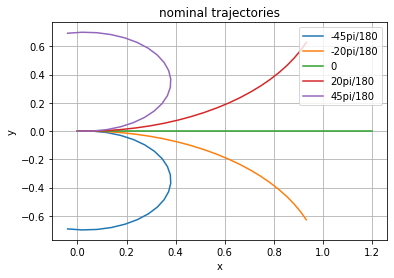

In [5]:
plt.figure
plt.plot(trajectory_table[0,:,:][0,:],trajectory_table[0,:,:][1,:],label = '-45pi/180')
plt.plot(trajectory_table[1,:,:][0,:],trajectory_table[1,:,:][1,:],label = '-20pi/180')
plt.plot(trajectory_table[2,:,:][0,:],trajectory_table[2,:,:][1,:],label = '0')
plt.plot(trajectory_table[3,:,:][0,:],trajectory_table[3,:,:][1,:],label = '20pi/180')
plt.plot(trajectory_table[4,:,:][0,:],trajectory_table[4,:,:][1,:],label = '45pi/180')

plt.xlabel('x')
plt.ylabel('y')
plt.title("nominal trajectories")
plt.legend()
plt.grid()
plt.savefig('Picture4.png')